# 特徴量エンジニアリング

特定のアプリケーションに対して、最良のデータ表現を模索することを、特徴量エンジニアリング(feature engineering)と呼ぶ。

これは、実世界の問題を解こうとする、データサイエンティストや機械学習実践者の主要な仕事の1つである。

教師あり学習では、データを正しく表現することは、パラメータを適切に選ぶことよりも、大きな影響を与える。

In [74]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# ジュピターノートブック上でグラフを表示させるための処理
%matplotlib inline

import mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

## ワンホットエンコーディング(ダミー変数)

one-hot-encodingやone-out-of-N encodingやダミー変数とも呼ばれる。

ダミー変数とは、カテゴリ変数を1つ以上の0と1の値を持つ新しい特徴量で置き換えるものである。

値0と1を使えば、線形2クラス分類の式が意味を持つので、scikit-learnのほとんどのモデルを利用できる。

In [3]:
# このファイルにはコラム名を含んだヘッダがないので、header=Noneを指定し、コラム名を"names"で明示的に指定
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 
                 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(adult_path, header=None, index_col=False,names=names)

# 解説のために、いくつかのカラムだけを選択
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

# IPython.displayを使うとJupyter notebookできれいな出力が得られる
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 文字列で表されているカテゴリーデータのチェック

In [5]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

⬆︎gender（性別）にはMaleとFemaleという文字列しか含まれていない。

つまりこのデータは、既に整理されているということなので、ワンホットエンコーディングできる。
- 実際のアプリケーションでは、すべてのカラムの値を同様にテストする必要がある。

pandasでは、get_dummies関数を使って簡単にデータをワンホットエンコーディングすることができる

In [6]:
print("Original feature:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original feature:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-in

⬆︎ 連続値特徴量のageとhours-per-weekは変更されておらず、カテゴリ特徴量は取りうる値ごとに1つの特徴量を持つように拡張されていることがわかる。

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


value属性を用いれば、data_dummies DataFrameをNumPy配列に変換し、それを使って機械学習モデルを学習させることができる。

モデルを学習させる前に、ターゲット変数を分離する必要がある。

教師あり機械学習モデルを構築する際に、間違って出力変数や出力変数から導出されるような特性を特徴量に含めてしまうというのは、よくあるミス。

In [30]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# Numpy配列を取り出す
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


### エンコーディング後に分析を行う

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


## ビニング、離散化、線形モデル、決定木

最良のデータ表現方法は、データの意味だけでなく、利用する機会学習のモデルにも依存する。

In [33]:
X2, y2 = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False)

In [34]:
line[:15]

array([-3.   , -2.994, -2.988, -2.982, -2.976, -2.97 , -2.964, -2.958,
       -2.952, -2.946, -2.94 , -2.934, -2.928, -2.922, -2.916])

In [35]:
# reshape()は転置を行う関数?
line = line.reshape(-1, 1)

In [36]:
line[:15]

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946],
       [-2.94 ],
       [-2.934],
       [-2.928],
       [-2.922],
       [-2.916]])

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


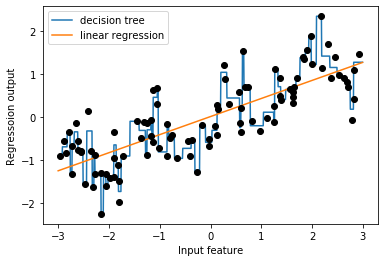

In [37]:
reg_dt = DecisionTreeRegressor(min_samples_split=3)
reg_dt.fit(X2, y2)
plt.plot(line, reg_dt.predict(line), label="decision tree")

reg_lr = LinearRegression()
reg_lr.fit(X2, y2)
plt.plot(line, reg_lr.predict(line), label="linear regression")

plt.plot(X2[:, 0], y2, 'o', c='k')
plt.ylabel("Regressoion output")
plt.xlabel("Input feature")
plt.legend(loc="best")

⬆︎ waveデータセットでの線形回帰と決定木の比較

線形モデルは線形の関係しかモデリングできない。1つしか特徴量がない場合には1本の線になる。

決定木ははるかに複雑なモデルを構築することができる。しかしこれはデータの表現に大きく依存する。

### 特徴量を複数の特徴量に分割（ビニング）
  - 連続値の特徴量を離散値の特徴量（カテゴリ変数）に変換している

線形モデルを連続データに対してより強力にする方法の1つとして特徴量のビニングもしくは離散化がある。

In [38]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


⬆︎ -3から3までを等間隔で10に区切る。

最初のビンには、-3から-2.4までのすべての数が入り、次のビンには-2.4から-1.8までの数が入る。

次に、個々のデータポイントがどのビンに入るかを記録する。これは、np.digitize関数で簡単にできる。

In [40]:
which_bin = np.digitize(X2, bins=bins)
print("\nData points: \n", X2[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


⬆︎ここで行ったのは、waveデータセットの単一の連続値入力特徴量の、どのビンにデータポイントが入っているかを表現したカテゴリ特徴量への置き換えである。

In [43]:
# OneHotEncoderで変換する
encoder = OneHotEncoder(sparse=False)

# encoder.fitでwhich_binに現れる整数値のバリエーションを確認
encoder.fit(which_bin)

# transformでワンホットエンコーディングを行う
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


⬆︎10ビンを指定したので、変換されたデータセットX_binnedには10個の特徴量ができている。

In [44]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


⬆︎ 100行10列

## 交互作用と多項式

特徴量表現をより豊かにするもう1つの方法として、特に線形モデルに有効なものが、もとのデータの`交互作用特徴量(interaction feature)`と`多項式特徴量(polynomial feature)`を加える方法である。

# 自動特徴量選択

## 単変量統計

単変量統計では、個々の特徴量とターゲットとの間に統計的に顕著な関係があるかどうかを計算する。

そして、最も高い確信度で関連している特徴量が選択される。

クラス分類の場合は、分散分析（analysis of variance: ANOVA）として知られる手法である。\
この方法の特性は`単変量`であることである。 したがって、他の特徴量と組み合わさって意味を持つような特徴量は捨てられてしまう。

単変量テストは計算が高速で、モデルを構築する必要がない。一方で、特徴量選択後に利用するモデルと完全に独立である。

### クラス分類に特徴量抽出を適用

In [46]:
cancer = load_breast_cancer()

In [47]:
# シードを指定して乱数を決定
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# ノイズ特徴量をデータに加える
## 最初の30特徴量はデータセットから来たもの。
## 続く50特徴量はノイズ
X_w_noise = np.hstack([cancer.data, noise])

In [48]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# f_classif(デフォルト)とSelectPercentile(percentile=50)を使って、50%の特徴量を選択
select = SelectPercentile(percentile=50)
select.fit(X3_train, y3_train)

SelectPercentile(percentile=50, score_func=<function f_classif at 0x1c27b413b0>)

In [49]:
# 訓練セットを変換
X_train_selected = select.transform(X3_train)

print("X_train.shape: {}".format(X3_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


⬆︎ 特徴量の数が80から40に減っている（もとの特徴量の50%）ことがわかる。

どの特徴量が使われているかをget_supportメソッドで調べることができる。
  - このメソッドは選択された特徴量を示す真偽値のマスクを返す。

In [50]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

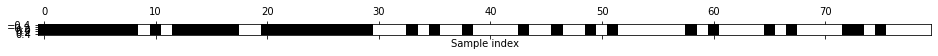

In [51]:
# マスクを可視化する -- 黒が真、白が偽
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

⬆︎ SelectPercentileで選択された特徴量

可視化したマスクでわかるように、もとの特徴量がほどんど選択されており、ほとんどのノイズ特徴量は取り除かれている。

しかし、もとの特徴量の回復は完全ではない。

In [55]:
# テストデータの変換
X_test_selected = select.transform(X3_test)

lr2 = LogisticRegression()
lr2.fit(X3_train, y3_train)
print("Score with all features: {:.3f}".format(lr2.score(X3_test, y3_test)))

lr2.fit(X_train_selected, y3_train)
print("Score with only selected features: {:.3f}".format(lr2.score(X_test_selected, y3_test)))

Score with all features: 0.930
Score with only selected features: 0.940


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


⬆︎ この場合、ノイズ特徴量を取り除くと、もとの特徴量のいくつかが失われているにも関わらず、性能が向上している。

これは、単純な合成したサンプルでの結果で、実際のデータに適応すると性能が向上するとは限らない。

それでも、特徴量が多すぎてモデルを作ることができないような場合や、多くの特徴量がまったく関係ないと思われるような場合には、単変量特徴量選択は有用である。

## モデルベース特徴量選択

モデルベース特徴量選択は、教師あり学習モデルを用いて個々の特徴量の重要性を判断し、重要なものだけを残す手法である。

特徴量選択に用いる教師あり学習モデルは、最終的に使う教師あり学習モデルでなくてもよい。

特徴量選択に用いるモデルは、選択時に特徴量に順番をつけるために、個々の特徴量の重要性の指標を出力するものでなければならない。

モデルベースの選択は、すべての特徴量を同時に考慮する。

モデルベース特徴量選択を用いるにはSelectFromModel変換器を用いればよい。

In [57]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

⬆︎ SelectFromModelクラスは教師あり学習モデルで得られた特徴量の重要性が、指定したスレッショルドよりも大きい特徴量だけを選択する。

In [58]:
select.fit(X3_train, y3_train)
X_train_l1 = select.transform(X3_train)
print("X_train.shape: {}".format(X3_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


### 選択された特徴量を可視化

Text(0.5, 0, 'Sample index')

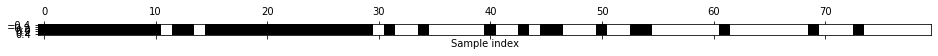

In [59]:
mask = select.get_support()

# マスクを可視化する --黒が真、白が偽
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

⬆︎ RandomForestClassifierを用いてSelectFromModelで選択された特徴量

元々存在していた特徴量を2つ取り除き選択されている。

40の特徴量が選択されているので、ノイズ特徴量もいくつか選択されている。

In [60]:
X_test_l1 = select.transform(X3_test)
lg = LogisticRegression()
lg.fit(X_train_l1, y3_train)
score = lg.score(X_test_l1, y3_test)

print("Test score: {:.3f}".format(score))

Test score: 0.951


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


⬆︎ 良い特徴量を選択することで性能も向上している。

## 反復特徴量選択

反復特徴量選択では、異なる特徴量を用いた一連のモデルを作る。

これには2つの基本的な方法がある。
  - まったく特徴量を使わないところから、ある基準が満たされるところまで1つずつ特徴量を加えていく方法
  - すべての特徴量を使う状態から1つずつ特徴量を取り除いていく方法

### 再帰的特徴量削減（recursive feature elimination : RFE）

この方法は、すべての特徴量から開始してモデルを作り、そのモデルで最も重要度が低い特徴量を削除する。\
そしてまたモデルを作り、最も重要度が低い特徴量を削除する。

この過程を事前に定めた数の特徴量になるまで繰り返す。

これが機能するためには、モデルベース選択の場合と同様に、選択に用いるモデルが特徴量の重要性を決定する方法を提供していなければならない。

In [63]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X3_train, y3_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=40, step=1, verbose=0)

Text(0.5, 0, 'Sample index')

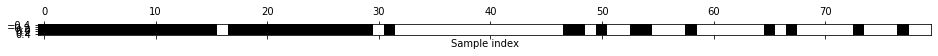

In [65]:
# 選択された特徴量を可視化する
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

⬆︎ ランダムフォレストクラス分類モデルを用いて再帰的特徴量削減（RFE）で選択された特徴量

この方法はモデルベース選択の場合に比べてもはるかに時間がかかる。
  - 1つずつ特徴量を落としていくために、ランダムフォレストを40回も学習していため

In [67]:
X_train_rfe = select.transform(X3_train)
X_test_rfe = select.transform(X3_test)

lg2 = LogisticRegression()
lg2.fit(X_train_rfe, y3_train)
score = lg2.score(X_test_rfe, y3_test)

print("Test score: {:.3f}".format(score))

Test score: 0.951


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
# REFの内部で用いられたモデルを用いて予測を行うこともできる。
# これは選択された特徴量だけを用いる。
print("Test score: {:.3f}".format(select.score(X3_test, y3_test)))

Test score: 0.951


⬆︎ RFE内部で用いられたランダムフォレストの性能は、選択された特徴量で訓練したロジスティック回帰モデルと`同じ`である。

つまり、適切な特徴量を選んだことで、線形モデルの性能がランダムフォレストと同じになったということである。

### 重要な結論

機械学習アルゴリズムに対してどの特徴量を入力として使ったらよいかわからない場合には、`自動特徴量選択`は有用である。

# 特徴量エンジニアリングの利用例

## 専門家知識の利用

特徴量エンジニアリングでは、特定のアプリケーションに関する専門知識（expert knowledge）を利用することができる。

ドメインの専門家が、最初に得られるデータ表現よりもはるかに情報量の多い有用な特徴量を特定する手助けをしてくれることは多い。
  - 例、アドテク に関する知識を持ったビジネス職の方にヒアリングをして、アドテク に関する有用な特徴量を特定する。

## （例）旅行代理店にて、航空運賃の値段の予測

価格と日付と航空会社、発着地点を記録しているとする。　しかし、航空運賃を決定する重要な要素がこの情報には欠けている。

例えば、航空運賃は、休暇期間や、祝祭日の周辺で高価になる。\
(クリスマスなどのように)日程が固定している祭日に関しては、その効果をデータから学習することも可能だろう。\
しかし、月の満ち欠けに依存して日程が決まる祭日（ハヌカーやイースター）や、権威者が決めるような休日（学校の休日など）に関してはそうはいかない。

このようなイベントは、フライトの記録が普通の日付でだけ記録されていたのでは、学習することができない。

しかし、フライトが休日の場合、休前日の場合、休日の翌日の場合を記録した特徴量を追加するのは簡単である。\
つまり、タスクの性質に関する事前知識を特徴量にエンコードし、機械学習アルゴリズムを強化することは容易である。

## （例）レンタル自転車の件数の予測

ここでのタスクは、ある特定の日時に、どのくらいの人がAndreasの家の前にあるステーションで自転車をレンタルするかを予測することである。

### データのロード

In [69]:
citibike = mglearn.datasets.load_citibike()
print("Citi Bike sata:\n{}".format(citibike.head()))

Citi Bike sata:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


### レンタル頻度を可視化

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rentals')

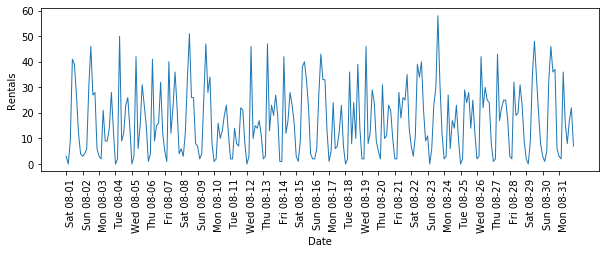

In [70]:
plt.figure(figsize=(10, 3))
xtick = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xtick, xtick.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

⬆︎ あるCiti Bikeステーションの自転車レンタル数

データから、24時間単位の昼間と夜間の区別が明確に見て取れる。　また、週末と平日のパターンも明確に異なる。

このような時系列に対する予測タスクでは、`過去から学習(learn from the past)`と`未来を予測する(predict for the future)`アプローチを取る。

つまり、訓練セットとテストセットを分割する際に、ある特定の日までのすべてのデータを訓練セットとし、それ以降をテストセットとする。

過去のレンタル履歴だけがわかっている状況で、明日何が起こるかを考える。ここでは最初の23日分に相当する184データポイントを訓練セットとし、残りの8日分に相当する64データポイントをテストセットとする。

この予測タスクにおいて利用する特徴量は、特定数のレンタルが発生した際の日時だけである。

つまり、入力特徴量は、例えば2015-08-01 00:00:00のような日時で、出力はその後3時間のレンタル数となる。

### 1つの整数特徴量をデータ表現に使用する

In [71]:
# ターゲット値（レンタル数）を抽出
y = citibike.values

# 10**9で割ってPOSIX時刻に変換
X = citibike.index.astype("int64").to_numpy().reshape(-1, 1) // 10**9

### データを訓練セットとテストセットに分割する関数を定義し、モデルを構築し、結果を可視化

In [72]:
# 最初の184データポイントを訓練に、残りをテストに使う
n_train = 184

In [76]:
# 与えられた特徴量セットで、回帰器を評価しプロットする関数
def eval_on_features(features, target, regressor):
    # 与えられた特徴量を訓練セットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]
    
    # ターゲットの配列も分割する
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.xticks(range(0, len(X), 8), xtick.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


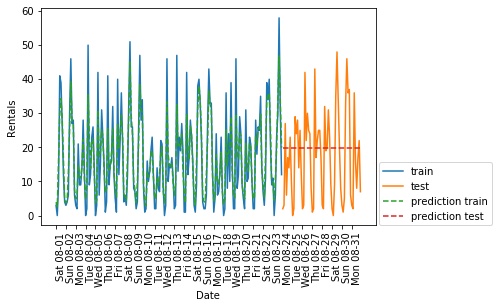

In [77]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

⬆︎ POSIX時刻だけを用いたランダムフォレストによる予測

テストセットに対して定数の線が予測されてしまっている。

R^2は-0.04となっており、これは`何も学習できていない`ことを意味している。

### 特徴量を変えて学習する。

POSIX時刻を特徴量から外し、「1日の中の時間帯」と「曜日」を特徴量に加える。

Test-set R^2: 0.60


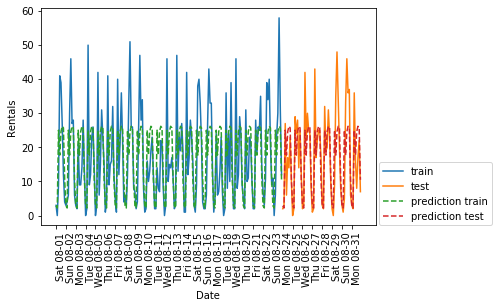

In [78]:
# まずは、1日の中の時刻だけで学習させる
X_hour = citibike.index.hour.to_numpy().reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

⬆︎ 1日の中の時刻だけを用いたランダムフォレストによる予測

R^2スコアははるかに良くなっているが、この予測は明らかに1週間周期のパターンを見落としている。

そのため、次は曜日情報を追加する。

Test-set R^2: 0.84


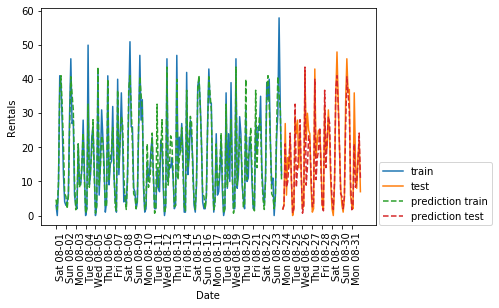

In [79]:
X_hour_week = np.hstack([citibike.index.dayofweek.to_numpy().reshape(-1, 1), 
                                                citibike.index.hour.to_numpy().reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

⬆︎ 1日の中の時刻と曜日を特徴量として用いたランダムフォレストによる予測

曜日と時刻を考慮に入れた周期的な挙動を捉えたモデルができた。

R^2スコアは0.84と予測性能も高くなっている。

このモデルが学習するのは、8月の最初の23日の曜日と時刻の組み合わせに対する平均レンタル数である。

これにはランダムフォレストのような複雑なモデルは必要ないはずなので、もっと簡単なLinerRegressionで試してみる。

Test-set R^2: 0.13


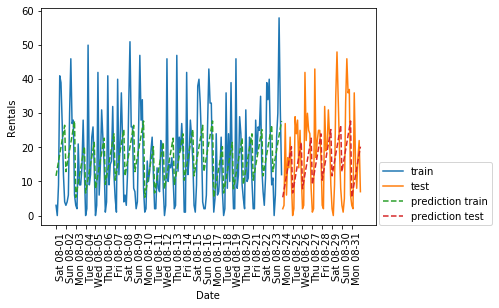

In [80]:
eval_on_features(X_hour_week, y, LinearRegression())